## Get a set of enhancers known to be constrained and a set that are assumed to be constrained, together with their Chen scores 

In [1]:
VERSION = 3

CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

NUMBER_NEGATIVE_EXAMPLES = 1000
LABELED_ENHANCERS = f'labeled-enhancers.{VERSION}.bed'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

In [2]:
import pandas as pd

def read_disease_enhancers_intersect_chen_windows():
  # download-process-data/khurana/README.md
  df = pd.read_csv(
    f"{CONSTRAINT_TOOLS_DATA}/khurana/disease-enhancers-intersect-chen-windows.bed", 
    sep = '\t',
    names = [
        'chrom_enhancer', 'start_enhancer', 'end_enhancer', 
        'disease', 'enhancer_predicted_LoF_tolerance_prob', 'enhancer_predicted_LoF_tolerance_status', 
        'chrom_window', 'start_window', 'end_window', 
        'new_chen_score_window'
    ]
  )
  df = df.drop_duplicates() 
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window', 'start_window', 'end_window',
    'disease', 'enhancer_predicted_LoF_tolerance_prob', 'enhancer_predicted_LoF_tolerance_status'
  ])
  df = df.rename(columns={
    'chrom_enhancer': 'chrom', 
    'start_enhancer': 'start', 
    'end_enhancer': 'end'
  })
  df['truly constrained'] = True
  df['tag'] = 'disease_enhancers'
  return df 

read_disease_enhancers_intersect_chen_windows()

,chrom,start,end,negative_new_chen_score_window,truly constrained,tag
0,chr1,21346107,21348107,-3.432213,True,disease_enhancers
1,chr1,93909844,93911044,-2.645724,True,disease_enhancers
2,chr1,155293209,155293609,-4.190955,True,disease_enhancers
3,chr1,160032410,160033810,-2.719339,True,disease_enhancers
4,chr1,160032410,160033810,-0.167476,True,disease_enhancers
...,...,...,...,...,...,...
116,chr20,46114761,46114961,0.241142,True,disease_enhancers
117,chr22,28787612,28789612,2.138137,True,disease_enhancers
118,chr22,28787612,28789612,0.488883,True,disease_enhancers
119,chr22,28787612,28789612,1.762075,True,disease_enhancers


In [3]:
# get low-lof-tolerance enhancers
def read_low_lof_tolerance_enhancers_intersect_chen_windows():
  # download-process-data/khurana/README.md
  df = pd.read_csv(
    f"{CONSTRAINT_TOOLS_DATA}/khurana/low-lof-tolerance-enhancers-intersect-chen-windows.bed", 
    sep = '\t',
    names = [
        'chrom_enhancer_hg38', 'start_enhancer_hg38', 'end_enhancer_hg38', 
        'enhancer_hg19', 'unknown',
        'chrom_window', 'start_window', 'end_window', 
        'new_chen_score_window'
    ]
  )
  df = df.drop_duplicates() 
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window', 'start_window', 'end_window',
    'enhancer_hg19', 'unknown'
  ])
  df = df.rename(columns={
    'chrom_enhancer_hg38': 'chrom', 
    'start_enhancer_hg38': 'start', 
    'end_enhancer_hg38': 'end'
  })
  df['truly constrained'] = True
  df['tag'] = 'low_lof_tolerance'
  return df 

read_low_lof_tolerance_enhancers_intersect_chen_windows().iloc[:10]

,chrom,start,end,negative_new_chen_score_window,truly constrained,tag
0,chr1,61587728,61589928,-0.884984,True,low_lof_tolerance
1,chr1,61587728,61589928,-3.667483,True,low_lof_tolerance
2,chr1,61587728,61589928,-1.787719,True,low_lof_tolerance
3,chr1,87355917,87357117,-1.174601,True,low_lof_tolerance
4,chr1,87355917,87357117,-2.971624,True,low_lof_tolerance
5,chr1,87355917,87357117,-1.597840,True,low_lof_tolerance
9,chr1,169941659,169943659,-0.732262,True,low_lof_tolerance
10,chr1,169941659,169943659,-0.494991,True,low_lof_tolerance
11,chr2,66069666,66071266,-1.628703,True,low_lof_tolerance
12,chr2,66069666,66071266,-1.923346,True,low_lof_tolerance


In [4]:
def read_enhancers_intersect_chen_windows():
  # download-process-data/khurana/README.md
  df = pd.read_csv(
    f"{CONSTRAINT_TOOLS_DATA}/khurana/enhancers-intersect-chen-windows.bed", 
    sep = '\t',
    names = [
        'chrom_enhancer', 'start_enhancer', 'end_enhancer', 
        'enhancer_deletion_status', 'enhancer_predicted_LoF_tolerance_status', 'enhancer_predicted_LoF_tolerance_prob', 
        'chrom_window', 'start_window', 'end_window', 
        'new_chen_score_window'
    ]
  )
  df = df.drop_duplicates() 
  df['negative_new_chen_score_window'] = -df['new_chen_score_window']
  df = df.drop(columns=[
    'new_chen_score_window',
    'chrom_window', 'start_window', 'end_window',
    'enhancer_deletion_status', 'enhancer_predicted_LoF_tolerance_status', 'enhancer_predicted_LoF_tolerance_prob'
  ])
  df = df.rename(columns={
    'chrom_enhancer': 'chrom', 
    'start_enhancer': 'start', 
    'end_enhancer': 'end'
  })
  df['truly constrained'] = False
  df['tag'] = '.'
  return df 

read_enhancers_intersect_chen_windows()

,chrom,start,end,negative_new_chen_score_window,truly constrained,tag
0,chr1,794220,794420,-4.034545,False,.
1,chr1,794620,795020,-4.034545,False,.
2,chr1,794620,795020,-4.072486,False,.
3,chr1,803820,804220,-3.779493,False,.
4,chr1,803820,804220,-0.767485,False,.
...,...,...,...,...,...,...
351771,chr22,50739172,50740572,-2.476451,False,.
351772,chr22,50748972,50749972,-2.543021,False,.
351773,chr22,50754572,50754772,0.087238,False,.
351774,chr22,50772572,50772972,-2.204285,False,.


In [5]:
def aggregate_over_windows(df): 
  columns = df.columns.tolist()
  group_columns = [column for column in columns if column != 'negative_new_chen_score_window']
  groups = df.groupby(group_columns)
  aggregation_functions = {'negative_new_chen_score_window': ['min', 'count']}
  aggregated = groups.agg(aggregation_functions)  
  df = aggregated.reset_index()
  df.columns = [' '.join(col[::-1]).strip() for col in df.columns.values]
  return df

aggregate_over_windows(read_enhancers_intersect_chen_windows())

,chrom,start,end,truly constrained,tag,min negative_new_chen_score_window,count negative_new_chen_score_window
0,chr1,794220,794420,False,.,-4.034545,1
1,chr1,794620,795020,False,.,-4.072486,2
2,chr1,803820,804220,False,.,-3.779493,2
3,chr1,804820,805620,False,.,-3.761746,2
4,chr1,828420,830620,False,.,-2.366455,2
...,...,...,...,...,...,...,...
201406,chr9,138037348,138037548,False,.,-1.328952,1
201407,chr9,138037948,138038948,False,.,-2.355119,2
201408,chr9,138040548,138041148,False,.,-2.570888,2
201409,chr9,138052748,138054748,False,.,-5.088021,2


In [6]:
from shell import shell 

def check_enhancers_non_overlapping():
  count_self_intersections = (
    f'bedtools intersect'
    f" -a <(tail -n +2 {CONSTRAINT_TOOLS_DATA}/khurana/labeled-enhancers.2.bed)"
    f" -b <(tail -n +2 {CONSTRAINT_TOOLS_DATA}/khurana/labeled-enhancers.2.bed)"
    f' -wao'
    f' | wc -l'
  )
  number_self_intersections = shell(count_self_intersections)
  count_number_lines = f'tail -n +2 {CONSTRAINT_TOOLS_DATA}/khurana/labeled-enhancers.2.bed | wc -l'
  number_lines = shell(count_number_lines)
  if number_self_intersections != number_lines:
    raise Exception(f'number of self-intersections ({number_self_intersections}) != number of lines ({number_lines})')
  else: 
    print(f'enhancers ({number_self_intersections}) are non-overlapping')


In [7]:
def remove_df2_from_df1(df1, df2): 
  merged_df = pd.merge(
    df1, 
    df2, 
    on=['chrom', 'start', 'end'], 
    how='left', 
    indicator=True
  )

  # Select the records in df1 that do not match records in df2 on the genome-coordinate columns
  filtered_df = ( 
    merged_df[merged_df['_merge'] == 'left_only']
    .drop([
        'truly constrained_y',
        'tag_y',	
        'min negative_new_chen_score_window_y',
        'count negative_new_chen_score_window_y',
        '_merge'  
      ], axis=1)
  )

  filtered_df.columns = [col.strip('_x') for col in filtered_df.columns]

  return filtered_df

def create_and_save_labeled_enhancers(): 
  positive_examples = pd.concat([    
    aggregate_over_windows(read_disease_enhancers_intersect_chen_windows()),
    aggregate_over_windows(read_low_lof_tolerance_enhancers_intersect_chen_windows())
  ])

  all_enhancers = aggregate_over_windows(read_enhancers_intersect_chen_windows())

  all_enhancers_less_positive_examples = remove_df2_from_df1(
    df1=all_enhancers,
    df2=positive_examples
  ) 

  # assume most enhancers are not constrained: 
  negative_examples = all_enhancers_less_positive_examples.sample(n=NUMBER_NEGATIVE_EXAMPLES, random_state=42) 
  negative_examples['tag'] = 'randomly_sampled'

  df = pd.concat([positive_examples, negative_examples])

  df = df.reset_index(drop=True) # create new index and drop old index
  df = df.reset_index(drop=False) # make new index into a column
  df = df.rename(columns={'index': 'enhancer_id'})
  new_order = df.columns[1:].tolist() + ['enhancer_id']
  df = df.reindex(columns=new_order)
  
  print('number of enhancers that are truly constrained (True) or not (False):') 
  print(df['truly constrained'].value_counts())

  df.to_csv(f"{CONSTRAINT_TOOLS_DATA}/khurana/{LABELED_ENHANCERS}", sep='\t', index=False)

  check_enhancers_non_overlapping() 

  return df 

pd.set_option('display.max_rows', 10)

create_and_save_labeled_enhancers()

number of enhancers that are truly constrained (True) or not (False):
False    1000
True      118
Name: truly constrained, dtype: int64


enhancers (1118) are non-overlapping


,chrom,start,end,truly constrained,tag,min negative_new_chen_score_window,count negative_new_chen_score_window,enhancer_id
0,chr1,21346107,21348107,True,disease_enhancers,-3.432213,1,0
1,chr1,93909844,93911044,True,disease_enhancers,-2.645724,1,1
2,chr1,155293209,155293609,True,disease_enhancers,-4.190955,1,2
3,chr1,160032410,160033810,True,disease_enhancers,-2.719339,2,3
4,chr1,173915262,173915462,True,disease_enhancers,-1.790974,1,4
...,...,...,...,...,...,...,...,...
1113,chr15,65439062,65439262,False,randomly_sampled,-0.055778,1,1113
1114,chr4,95341849,95343049,False,randomly_sampled,0.516198,3,1114
1115,chr7,150860312,150862712,False,randomly_sampled,-4.609014,3,1115
1116,chr10,93710243,93712443,False,randomly_sampled,-1.953375,3,1116


## Intersect labeled enhancers with ALL deletions from TopMed 

In [8]:
import numpy as np 

def collapse(ser): 
  unique_value, = set(ser)
  return unique_value

def count(ser): 
  if len(ser) == 1 and ser.iloc[0] == '.': return 0
  return len(ser) 

def custom_max(ser): 
  if len(ser) == 1 and ser.iloc[0] == '.': return '.'
  return np.max([int(value) for value in list(ser)])

def custom_list(ser): 
  if len(ser) == 1 and ser.iloc[0] == '.': return '.'
  return list(ser)

def aggregate_over_deletions(df, group_columns, aggregation_functions): 
  groups = df.groupby(group_columns)
  aggregated = groups.agg(aggregation_functions)  
  df = aggregated.reset_index()
  df.columns = [' '.join(col[::-1]).strip() for col in df.columns.values]
  return df

def read_labeled_enhancers_intersect_all_deletions():
  cmd = f'bash {CONSTRAINT_TOOLS}/experiments/germline-model/chen-et-al-2022/intersect-labeled-enhancers-{VERSION}-with-topmed-deletions.sh {VERSION}'
  print(shell(cmd))
  df = pd.read_csv(
    f"{CONSTRAINT_TOOLS_DATA}/khurana/labeled-enhancers-{VERSION}-intersect-topmed-deletions.bed", 
    sep = '\t',
  )  
  group_columns = [
    'chrom',
    'start',
    'end',
    'truly constrained',
    'tag',
    'min negative_new_chen_score_window',
    'count negative_new_chen_score_window',
    'enhancer_id'
  ]
  aggregation_functions = {
    'SVLEN': [custom_max],
    'SVTYPE': [collapse, count],
    # 'SV_ID': [custom_list],
    'Het': [custom_max],
    'HomAlt': [custom_max],
    # 'enhancer-deletion-overlap': [custom_max]
  }
  aggregation_columns = list(aggregation_functions.keys())
  new_columns = group_columns + aggregation_columns
  df = df[new_columns]
  df = aggregate_over_deletions(df, group_columns, aggregation_functions)
  df = df.rename(columns={
    'chrom': 'chrom_enhancer',
    'start': 'start_enhancer',
    'end': 'end_enhancer',
  })
  df['enhancer is deleted in topmed'] = df['collapse SVTYPE'] == 'DEL'
  print('number of enhancers that are deleted in TopMed (True) or not (False):')
  print(df['enhancer is deleted in topmed'].value_counts())
  return df   
  
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

ENHANCERS = read_labeled_enhancers_intersect_all_deletions()
ENHANCERS

Wrote labeled enhancers with intersecting topmed deletions to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/khurana/labeled-enhancers-3-intersect-topmed-deletions.bed

number of enhancers that are deleted in TopMed (True) or not (False):
True     715
False    403
Name: enhancer is deleted in topmed, dtype: int64


,chrom_enhancer,start_enhancer,end_enhancer,truly constrained,tag,min negative_new_chen_score_window,count negative_new_chen_score_window,enhancer_id,custom_max SVLEN,collapse SVTYPE,count SVTYPE,custom_max Het,custom_max HomAlt,enhancer is deleted in topmed
0,chr1,4829540,4831540,False,randomly_sampled,-0.576666,3,744,637654,DEL,2,2,0,True
1,chr1,10089742,10090542,False,randomly_sampled,0.064161,1,1051,6218011,DEL,1,1,0,True
2,chr1,15629705,15631505,False,randomly_sampled,-2.140236,2,547,6218011,DEL,1,1,0,True
3,chr1,18977506,18977706,False,randomly_sampled,-1.727014,1,158,10754,DEL,1,1,0,True
4,chr1,19532306,19534506,False,randomly_sampled,-2.666317,3,713,51475,DEL,1,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,chr9,125266921,125267321,False,randomly_sampled,-2.042458,1,149,11625,DEL,1,11,0,True
1114,chr9,125267921,125269721,False,randomly_sampled,-2.042458,1,965,11625,DEL,2,11,0,True
1115,chr9,129329921,129330721,False,randomly_sampled,-2.631926,2,135,.,.,0,.,.,False
1116,chr9,131071613,131072813,False,randomly_sampled,-2.883417,2,676,.,.,0,.,.,False


## Using Chen zscore to predict whether an enhancer is critical or not, and improving that prediction using TopMed deletions

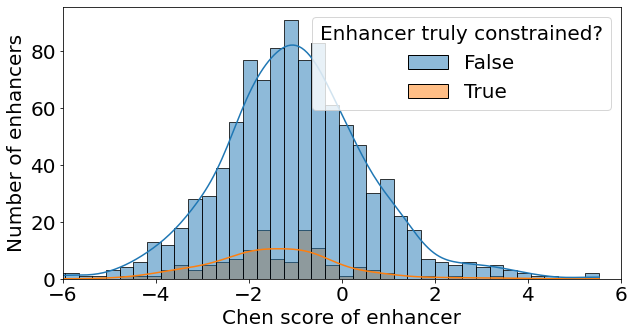

_container0
Area under the curve: 34.76
_container1
Area under the curve: 294.61


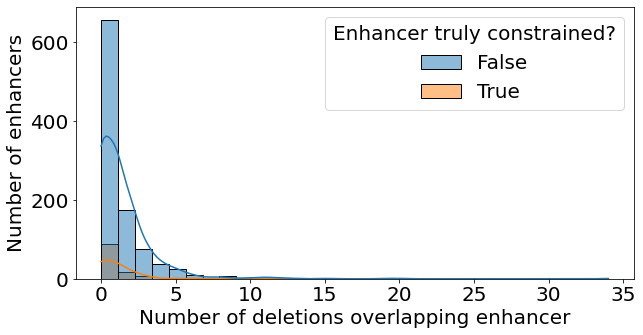

_container0
Area under the curve: 133.73
_container1
Area under the curve: 1133.33


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the font size
mpl.rcParams['font.size'] = 20

def plot_score_distributions(df, score, xlabel, bins, xlim=None):
  ax = sns.histplot(data=df, x=score, kde=True, bins=bins, hue='truly constrained', stat='count') # stat='density'
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Number of enhancers')
  if xlim is not None: ax.set_xlim(xlim)
  legend = ax.get_legend()
  legend.set_title('Enhancer truly constrained?')
  fig = plt.gcf()
  fig.set_size_inches(10, 5)
  plt.show()

  # Compute the area under the curve for each histogram
  for container in ax.containers:
    print(container.get_label())
    area = 0
    for bar in container.patches:
      area += bar.get_width() * bar.get_height()
    print(f"Area under the curve: {area:.2f}")

plot_score_distributions(ENHANCERS, score='min negative_new_chen_score_window', xlabel='Chen score of enhancer', bins=40, xlim=(-6, 6))
plot_score_distributions(ENHANCERS, score='count SVTYPE', xlabel='Number of deletions overlapping enhancer', bins=30)

In [10]:
def predict_constraint_without_deletions(df, zscore_threshold): 
  score = 'min negative_new_chen_score_window'
  df = df[[score, 'truly constrained']].copy()
  df['predicted to be constrained'] = df[score] < zscore_threshold
  return df

predict_constraint_without_deletions(ENHANCERS, zscore_threshold=-2)

,min negative_new_chen_score_window,truly constrained,predicted to be constrained
0,-0.576666,False,False
1,0.064161,False,False
2,-2.140236,False,True
3,-1.727014,False,False
4,-2.666317,False,True
...,...,...,...
1113,-2.042458,False,True
1114,-2.042458,False,True
1115,-2.631926,False,True
1116,-2.883417,False,True


In [11]:
def predict_constraint_using_deletions(df, zscore_threshold): 
  score = 'min negative_new_chen_score_window'
  df = df[[
    score, 
    'truly constrained', 
    'enhancer is deleted in topmed'
  ]].copy()
  df['predicted to be constrained'] = (
    (df[score] < zscore_threshold) & 
    (df['enhancer is deleted in topmed'] == False)
  )
  return df

pd.set_option('display.max_rows', 10)

predict_constraint_using_deletions(ENHANCERS, zscore_threshold=-2)

,min negative_new_chen_score_window,truly constrained,enhancer is deleted in topmed,predicted to be constrained
0,-0.576666,False,True,False
1,0.064161,False,True,False
2,-2.140236,False,True,False
3,-1.727014,False,True,False
4,-2.666317,False,True,False
...,...,...,...,...
1113,-2.042458,False,True,False
1114,-2.042458,False,True,False
1115,-2.631926,False,False,True
1116,-2.883417,False,False,True


In [12]:
def compute_precision_recall(df, zscore_threshold, predict_constraint, log=False): 
  df = predict_constraint(df, zscore_threshold)
  
  contingency_table = pd.crosstab(
    df['predicted to be constrained'], 
    df['truly constrained']
  )

  if log:   
    print(zscore_threshold)
    print(contingency_table)

  tp = contingency_table.loc[True, True]
  fp = contingency_table.loc[True, False]
  fn = contingency_table.loc[False, True]
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)

  return precision, recall
  
compute_precision_recall(ENHANCERS, zscore_threshold=-3, predict_constraint=predict_constraint_without_deletions, log=True)

-3
truly constrained            False  True
predicted to be constrained             
False                          909   104
True                            91    14


(0.13333333333333333, 0.11864406779661017)

In [13]:
compute_precision_recall(ENHANCERS, zscore_threshold=-3, predict_constraint=predict_constraint_using_deletions, log=True)

-3
truly constrained            False  True
predicted to be constrained             
False                          959   110
True                            41     8


(0.16326530612244897, 0.06779661016949153)

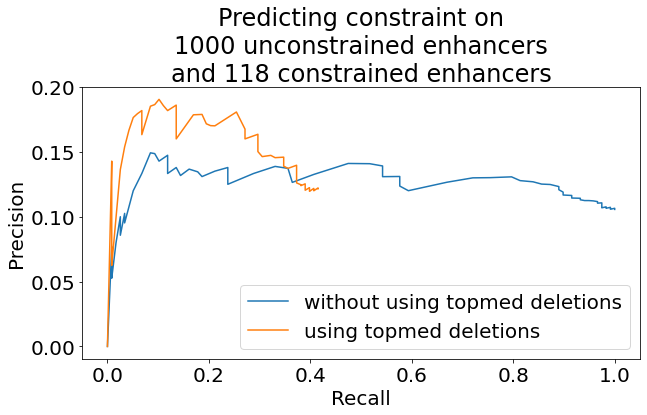

In [14]:
def plot_precision_recall(df, predict_constraint, label): 
  zscore_thresholds = np.arange(-6, 5.5, 0.1) 
  precision_recall = [
    compute_precision_recall(df, zscore_threshold, predict_constraint, log=False)
    for zscore_threshold in zscore_thresholds
  ]
  precisions, recalls = zip(*precision_recall)
  plt.plot(recalls, precisions, label=label)

def plot_precision_recall_wrapper(df): 
  plot_precision_recall(df, predict_constraint_without_deletions, label='without using topmed deletions')
  plot_precision_recall(df, predict_constraint_using_deletions, label='using topmed deletions')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend()
  fig = plt.gcf()
  fig.set_size_inches(10, 5)

  number_unconstrained_enhancers = df['truly constrained'].value_counts().loc[False]
  number_constrained_enhancers = df['truly constrained'].value_counts().loc[True]
  plt.title(
    'Predicting constraint on\n'
    f'{number_unconstrained_enhancers} unconstrained enhancers\n'
    f'and {number_constrained_enhancers} constrained enhancers'
  )
  

plot_precision_recall_wrapper(ENHANCERS)